In [1]:
##### BASE IMPORT #####

import pandas as pd
import numpy as np
import seaborn as sns

##### Plotting #####

import matplotlib.pyplot as plt
%matplotlib inline


##### SKLEARN MODEL BASE ######

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

##### cohen_kappa_score #####

from sklearn.metrics import cohen_kappa_score

##### confusion_matrix #####

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


In [2]:
path = 'fashion-product-images-small/styles.csv'
df = pd.read_csv(path, error_bad_lines = False)

b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

In [3]:
df.head(3)
len(df)

44424

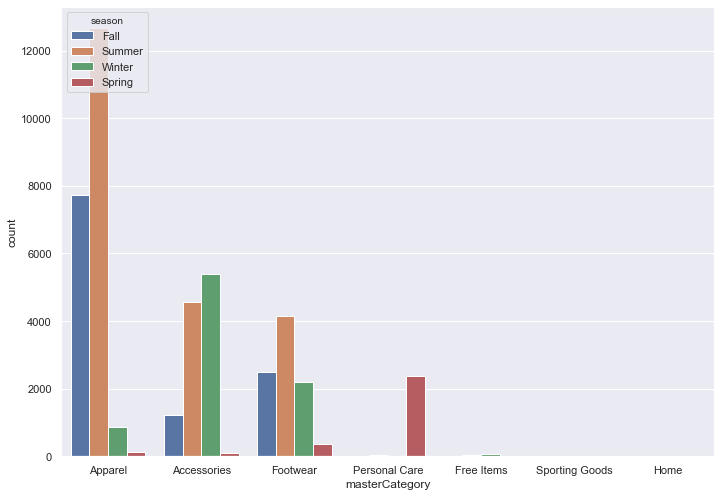

In [4]:
sns.set(style='darkgrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot('masterCategory', hue = 'season',data = df)

In [5]:
arr3664 = plt.imread('fashion-product-images-small/images/3664.jpg')

In [6]:
print(arr3664.shape)

(80, 60, 3)


In [7]:
arr3664flat = arr3664.flatten()


In [8]:
print(arr3664flat.shape)

(14400,)


In [9]:
arrays = []

In [10]:
names = []
masterCategory = []

In [11]:
for x in range(len(df)):
    id = df['id']
    ids = id[x]
    names.append(ids)

In [12]:
for x in range(len(df)):
    mc = df['masterCategory']
    mcs = mc[x]
    masterCategory.append(mcs)

In [13]:
len(masterCategory)

44424

In [14]:
len(names)

44424

In [15]:
errors = []
for i in names:
    try: 
        array = plt.imread(f'fashion-product-images-small/images/{i}.jpg')
        if array.shape != (80, 60, 3):
            errors.append(i)
        else:
            arrays.append(array.flatten())
    except:
        error = i
        errors.append(error)

In [16]:
print(len(errors))

459


In [22]:
for error in errors:
    if error in names: names.remove(error)
    if error in masterCategory: masterCategory.remove()

In [23]:
arrays

[array([255, 255, 255, ..., 255, 255, 251], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 2

In [24]:
633096000/14400

43965.0

In [25]:
arrays[0].shape


(14400,)

In [26]:
var = np.concatenate(arrays).reshape((43965, 14400))

In [27]:
imagedf = pd.DataFrame(var)

In [28]:
print(imagedf.head())

   0      1      2      3      4      5      6      7      8      9      ...  \
0    255    255    255    255    255    255    255    255    255    255  ...   
1    255    255    255    255    255    255    255    255    255    255  ...   
2    255    255    255    255    255    255    255    255    255    255  ...   
3    255    255    255    255    255    255    255    255    255    255  ...   
4    255    255    255    255    255    255    255    255    255    255  ...   

   14390  14391  14392  14393  14394  14395  14396  14397  14398  14399  
0    255    254    255    255    254    255    253    255    255    251  
1    255    255    255    255    255    255    255    255    255    255  
2    255    255    255    255    255    255    255    255    255    255  
3    255    255    255    255    255    255    255    255    255    255  
4    255    255    255    255    255    255    255    255    255    255  

[5 rows x 14400 columns]


In [29]:
imagedf['id'] = names

In [30]:
imagedf

,0,1,2,3,4,5,6,7,8,9,...,14391,14392,14393,14394,14395,14396,14397,14398,14399,id
0,255,255,255,255,255,255,255,255,255,255,...,254,255,255,254,255,253,255,255,251,15970
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,39386
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,21379
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,53759
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,1855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43960,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,17036
43961,195,192,185,195,192,185,196,193,186,196,...,192,189,184,192,189,184,192,189,184,6461
43962,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,18842
43963,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,46694


In [31]:
master_df = pd.merge(imagedf, df, on='id', how='inner')

In [32]:
master_df = master_df.drop(['id'], axis=1)

In [34]:
master_df = pd.read_csv('master_df.csv')

In [35]:
master_df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,14399,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,0,255,255,255,255,255,255,255,255,255,...,251,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,1,255,255,255,255,255,255,255,255,255,...,255,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,2,255,255,255,255,255,255,255,255,255,...,255,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
3,3,255,255,255,255,255,255,255,255,255,...,255,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
4,4,255,255,255,255,255,255,255,255,255,...,255,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519,1519,255,255,255,255,255,255,255,255,255,...,255,Men,Footwear,Shoes,Sports Shoes,Black,Fall,2011.0,Sports,Fila Men's Victory Black Shoe
1520,1520,254,254,254,254,254,254,254,254,254,...,254,Unisex,Accessories,Bags,Backpacks,Grey,Spring,2013.0,Casual,Wildcraft Unisex Grey & Black Backpack
1521,1521,254,254,254,254,254,254,254,254,254,...,254,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Timex Men Black Dial Watch L506
1522,1522,255,255,255,255,255,255,255,255,255,...,255,Men,Personal Care,Fragrance,Perfume and Body Mist,Black,Spring,2017.0,Casual,Yves Saint Laurent Men Body Kouros Perfume


In [36]:
X, y = master_df.iloc[:,:14400], master_df['masterCategory']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2)

In [38]:
pca = PCA(n_components=15)

In [39]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=15, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [40]:
P_train = pca.transform(X_train)

In [41]:
P_test = pca.transform(X_test)

In [42]:
LogR = LogisticRegression(random_state = 5, solver = 'lbfgs', multi_class = 'ovr')


In [43]:
LogR.fit(P_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=5,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [44]:
predictions = LogR.predict(P_test)

In [45]:
LogR.score(P_test, y_test)

0.8885245901639345

In [46]:
cohen_kappa_score(y_test, predictions)

0.8312778627444599

In [47]:
predictions

array(['Footwear', 'Apparel', 'Apparel', 'Footwear', 'Footwear',
       'Apparel', 'Apparel', 'Apparel', 'Apparel', 'Footwear', 'Apparel',
       'Apparel', 'Apparel', 'Apparel', 'Apparel', 'Footwear',
       'Accessories', 'Accessories', 'Apparel', 'Accessories', 'Footwear',
       'Apparel', 'Accessories', 'Accessories', 'Apparel', 'Apparel',
       'Accessories', 'Accessories', 'Accessories', 'Apparel', 'Footwear',
       'Footwear', 'Apparel', 'Footwear', 'Apparel', 'Footwear',
       'Footwear', 'Apparel', 'Footwear', 'Accessories', 'Apparel',
       'Apparel', 'Accessories', 'Accessories', 'Footwear', 'Apparel',
       'Apparel', 'Personal Care', 'Footwear', 'Accessories', 'Apparel',
       'Apparel', 'Footwear', 'Accessories', 'Apparel', 'Accessories',
       'Apparel', 'Accessories', 'Accessories', 'Footwear', 'Footwear',
       'Accessories', 'Apparel', 'Apparel', 'Accessories', 'Apparel',
       'Apparel', 'Accessories', 'Apparel', 'Apparel', 'Apparel',
       'Accessories', 

In [48]:
matrix = confusion_matrix(y_test, predictions)

Text(0.5, 1, 'Confusion Matrix')

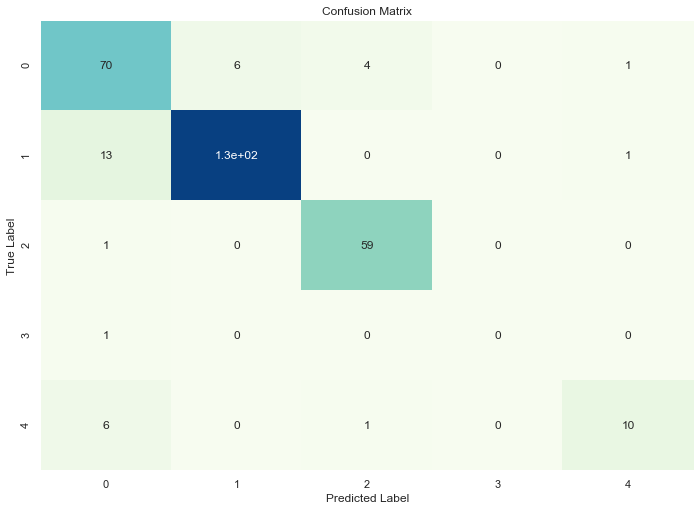

In [49]:
sns.heatmap(matrix, annot=True,cbar=False, cmap='GnBu')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

In [50]:
P_train.shape

(1219, 15)

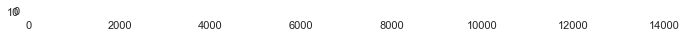

In [101]:
plt.imshow(pca.components_)

In [52]:
pca_comp = pca.components_

In [53]:
pca_arrays = []


In [54]:
for a in range(15):
    pca_array = pca_comp[a].reshape(80,60,3)
    pca_arrays.append(pca_array)

In [55]:
pca_arrayss = np.array(pca_arrays)

In [56]:
pca_arrayss.shape

(15, 80, 60, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


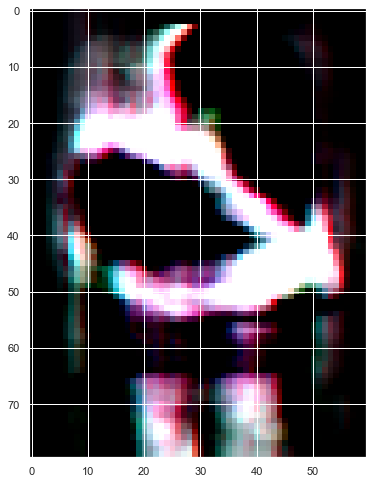

In [102]:
plt.imshow(pca_array*100)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


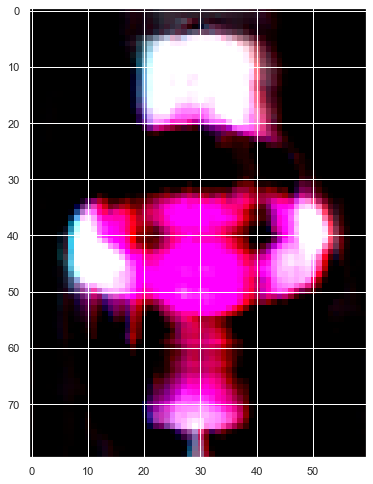

In [103]:
plt.imshow(pca_arrays[7]*100)

In [106]:
pca_test = plt.imread('fashion-product-images-small/images/3674.jpg')

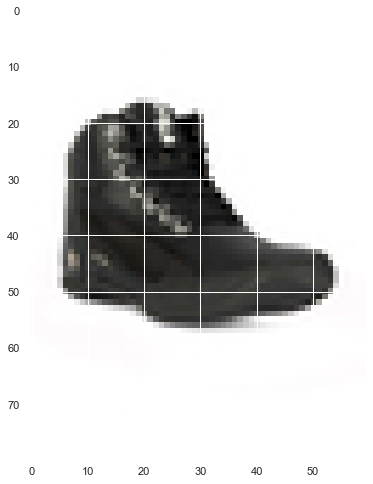

In [107]:
plt.imshow(pca_test)

In [108]:
pca_test_flat = pca_test.flatten()

In [109]:
pca_test_flat = pca_test_flat.reshape(1, 14400)

In [110]:
trans_pca_test_flat = pca.transform(pca_test_flat)

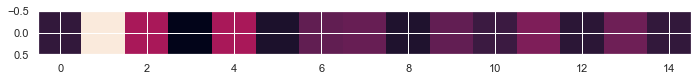

In [111]:
plt.imshow(trans_pca_test_flat)

In [112]:
dot_pca_test = np.dot(trans_pca_test_flat, pca.components_)

In [113]:
dot_pca_test_reshaped = dot_pca_test.reshape(80,60,3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


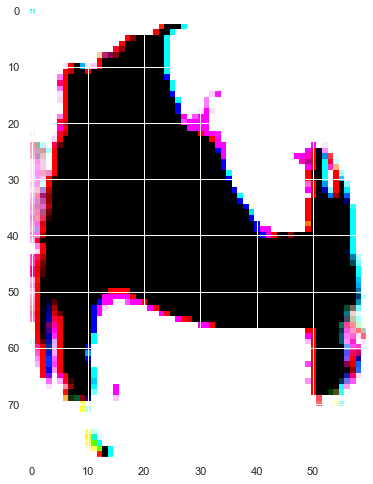

In [114]:
plt.imshow(dot_pca_test_reshaped)